<a href="https://colab.research.google.com/github/SaraNauman/python/blob/main/sara_Version_Week4_Groupby_Cross_Tab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [2]:
titanic_df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
# Activity 1: Calculate and display the survival rate for each combination of embarkation point (Embarked) and gender (Sex).

survival_rates = titanic_df.groupby(['Embarked', 'Sex'])['Survived'].mean() * 100
survival_rates = survival_rates.reset_index().rename(columns={'Survived': 'Survival Rate (%)'})
print(survival_rates)


  Embarked     Sex  Survival Rate (%)
0        C  female          87.671233
1        C    male          30.526316
2        Q  female          75.000000
3        Q    male           7.317073
4        S  female          68.965517
5        S    male          17.460317


In [4]:
# Activity 2: Average Fare by Passenger Class and Age Group
# Create age groups (e.g., 0-10, 11-20, 21-30, etc.).
# Calculate and display the average fare for each passenger class (Pclass) within each age group.

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_df['Age Group'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels, right=False)
average_fare_by_class_age = titanic_df.groupby(['Pclass', 'Age Group'])['Fare'].mean().reset_index()
print(average_fare_by_class_age)


    Pclass Age Group        Fare
0        1      0-10  128.319433
1        1     11-20  114.106250
2        1     21-30  101.603797
3        1     31-40   98.344334
4        1     41-50   67.985141
5        1     51-60   74.600770
6        1     61-70   64.262177
7        1     71-80   51.719467
8        2      0-10   28.740200
9        2     11-20   20.934489
10       2     21-30   22.273113
11       2     31-40   19.616146
12       2     41-50   23.125000
13       2     51-60   16.025000
14       2     61-70   20.000000
15       2     71-80   10.500000
16       3      0-10   24.338390
17       3     11-20   13.452276
18       3     21-30   10.273399
19       3     31-40   12.814730
20       3     41-50   13.250124
21       3     51-60    7.700700
22       3     61-70    7.858333
23       3     71-80    7.762500


<ipython-input-4-3bccec3bd124>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_by_class_age = titanic_df.groupby(['Pclass', 'Age Group'])['Fare'].mean().reset_index()


In [5]:
# Activity 3: Survival Rate by Family Size and Passenger Class
# Create a new column called 'FamilySize' representing the total size of each family (SibSp + Parch + 1).
# Analyze the survival rate for each passenger class (Pclass) grouped by family size.

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
survival_rate_by_family_size = titanic_df.groupby(['Pclass', 'FamilySize'])['Survived'].mean() * 100
survival_rate_by_family_size = survival_rate_by_family_size.reset_index().rename(columns={'Survived': 'Survival Rate (%)'})
print(survival_rate_by_family_size)

    Pclass  FamilySize  Survival Rate (%)
0        1           1          53.211009
1        1           2          72.857143
2        1           3          75.000000
3        1           4          71.428571
4        1           5         100.000000
5        1           6          50.000000
6        2           1          34.615385
7        2           2          52.941176
8        2           3          67.741935
9        2           4          76.923077
10       2           5         100.000000
11       2           6         100.000000
12       3           1          21.296296
13       3           2          35.087719
14       3           3          42.553191
15       3           4          66.666667
16       3           5           0.000000
17       3           6           0.000000
18       3           7          33.333333
19       3           8           0.000000
20       3          11           0.000000


<ipython-input-6-dc17f39792e2>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_class = titanic_df.groupby(['Pclass', 'Age Group'])['Survived'].mean()


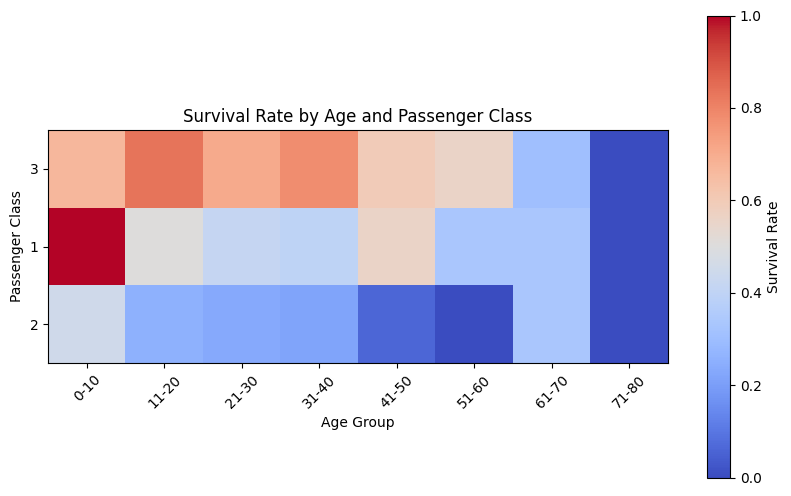

In [6]:
# Activity 4: Visualizing Survival Rate by Age and Passenger Class
# Create a visualization (e.g., a heatmap) showing the survival rate for different age groups (as in Activity 2) and passenger classes.

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_df['Age Group'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels, right=False)
survival_rate_by_age_class = titanic_df.groupby(['Pclass', 'Age Group'])['Survived'].mean()
survival_rate_by_age_class = survival_rate_by_age_class.unstack()
plt.figure(figsize=(10, 6))
plt.imshow(survival_rate_by_age_class, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Survival Rate')
plt.title('Survival Rate by Age and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Passenger Class')
plt.xticks(range(len(age_labels)), age_labels, rotation=45)
plt.yticks(range(len(titanic_df['Pclass'].unique())), titanic_df['Pclass'].unique())
plt.show()

In [7]:
# Activity 5:  Advanced Pivot Table Analysis: Survival Rate, Fare, and Age
# Construct a pivot table that simultaneously presents:
#   - The average survival rate
#   - The median fare
#   - The average age
# Grouped by 'Pclass' and 'Sex'.
# Handle potential missing values in the pivot table.

pivot_table = titanic_df.pivot_table(values=['Survived', 'Fare', 'Age'], index='Pclass', columns='Sex', aggfunc={'Survived': 'mean', 'Fare': 'median', 'Age': 'mean'})
pivot_table = pivot_table.fillna(0)
print(pivot_table)

              Age                 Fare           Survived          
Sex        female       male    female     male    female      male
Pclass                                                             
1       34.611765  41.281386  82.66455  41.2625  0.968085  0.368852
2       28.722973  30.740707  22.00000  13.0000  0.921053  0.157407
3       21.750000  26.507589  12.47500   7.9250  0.500000  0.135447


In [8]:
# Bonus Activity: Investigate the relationship between survival rate, fare, and age, considering both gender and passenger class. Visualize your findings effectively.

pivot_table = titanic_df.pivot_table(values=['Survived', 'Fare', 'Age'], index=['Sex', 'Pclass'], aggfunc={'Survived': 'mean', 'Fare': 'median', 'Age': 'mean'})
pivot_table = pivot_table.fillna(0)
print(pivot_table)


                     Age      Fare  Survived
Sex    Pclass                               
female 1       34.611765  82.66455  0.968085
       2       28.722973  22.00000  0.921053
       3       21.750000  12.47500  0.500000
male   1       41.281386  41.26250  0.368852
       2       30.740707  13.00000  0.157407
       3       26.507589   7.92500  0.135447
